# **CNN Pre-processing**

This files contains the code we used to proprocess the GTZAN dataset before training our Convolutional Neural Network(CNN).<br>
#### **Pre-processing steps:**<br>
1. **Split audio files into 3 second segments**- This was done to increase the size of our dataset. The original GTZAN dataset only contains 1000 audio clips, which we beleived wouldn't be enough to build a strong model. To address this, we split each audio clip into 10 3-second segments, allowing us to have a dataset of nearly 10000 audio clips. While we may lose some quality in our data, 3 seconds is still a resonable amount that humans can guess a genre in, so we thought the trade-off was worth it.
2.  **Convert audio clips to mel-spectrogram images**- CNNs have been proven to be some of the best deep learning models for the task of image classification. Because of this, we needed to convert our audio clips into images to use for training the CNN. The Kaggle dataset came with images for the 30 seconds clips, but since we had split the clips, we needed to create the images. For this, we converted each audio file into a mel-spectrogram. Mel-spectrograms show the frequencies of audio over time, on a scale that represents how humans detect frequencies (It's kind of long to explain). We create Mel-spectrograms for each of the 3 second segments created earlier, and save them as PNG files

In [78]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import librosa
from PIL import Image
from pydub import AudioSegment
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import os
import time

# **Splitting Audio Files in 3 second segments**

In [4]:
genres = [f for f in os.listdir("Data/genres_original/")]

In [6]:
for genre in genres:
    os.makedirs(f"Data/genres_3sec/{genre}")

In [14]:
corrupt_files = []

In [15]:
for genre in genres:
    start = time.time()
    files_to_split = [f for f in os.listdir(f"Data/genres_original/{genre}")]
    for file in files_to_split:
        filename_split = file.split(".")
        new_filename = filename_split[0]+'.'+filename_split[1]
        try:
            audio_segment = AudioSegment.from_wav(f"Data/genres_original/{genre}/{file}")
        except Exception as e:
            corrupt_files.append(file)
            continue
        for i in range(0, 10):
            t1 = 3 * i * 1000
            t2 = 3 * (i+1) * 1000
            new_segment = audio_segment[t1:t2]
            new_segment.export(f"Data/genres_3sec/{genre}/{new_filename}_{i+1}.wav", format="wav")
    end = time.time()
    print(f"{genre} split done in {end-start:0.2f} seconds")

blues split done in 1.19 seconds
classical split done in 1.12 seconds
country split done in 1.00 seconds
disco split done in 1.09 seconds
hiphop split done in 1.09 seconds
jazz split done in 1.46 seconds
metal split done in 1.88 seconds
pop split done in 1.88 seconds
reggae split done in 1.86 seconds
rock split done in 1.82 seconds


# **Converting 3 second segments into mel-spectograms**

#### **Testing the audio to mel-spectrogram conversion on one sample audio clip**

In [72]:
test_file = f"Data/genres_original/blues/blues.00000.wav"

In [73]:
y, sr = librosa.load(test_file, sr=None)

In [74]:
mel = librosa.feature.melspectrogram(y=y, sr=sr)

In [75]:
log_mel = librosa.power_to_db(mel, ref=np.max)

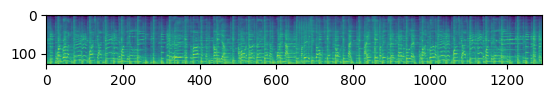

In [76]:
plt.imshow(np.flip(log_mel, axis=0))

#### **Converting all 3-second audio clips into mel-spectrograms and saving as PNG files**

In [88]:
for genre in genres:
    os.makedirs(f"Data/images_3sec/{genre}")

In [92]:
for genre in genres:
    start = time.time()
    files_to_convert = [f for f in os.listdir(f"Data/genres_3sec/{genre}")]
    for file in files_to_convert:
        filename_split = file.split('.')
        filename = filename_split[0]+'.'+filename_split[1]
        y, sr = librosa.load(f"Data/genres_3sec/{genre}/{file}", sr=None)
        mel = librosa.feature.melspectrogram(y=y, sr=sr)
        log_mel = librosa.power_to_db(mel, ref=np.max)

        cmap = plt.cm.magma
        norm = plt.Normalize()

        image = np.flip(cmap(norm(log_mel)), axis=0)

        plt.imsave(f"Data/images_3sec/{genre}/{filename}.png", image)
    end = time.time()
    print(f"{genre} image conversion done in {end - start:0.2f} seconds")

blues image conversion done in 47.61 seconds
classical image conversion done in 19.11 seconds
country image conversion done in 17.62 seconds
disco image conversion done in 17.30 seconds
hiphop image conversion done in 17.53 seconds
jazz image conversion done in 17.35 seconds
metal image conversion done in 17.87 seconds
pop image conversion done in 18.15 seconds
reggae image conversion done in 17.90 seconds
rock image conversion done in 17.58 seconds
